In [1]:
# importing packages

import pandas as pd
pd.set_option('display.max_columns', None) # makes dataframes more readable

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [2]:
# importing the cleaned dataset with players' NBA and college stats
final_df = pd.read_csv('players_cleaned_dataset.txt') 

In [3]:
# filtering the dataframe to only look at NBA players who played in college
final_df = final_df[final_df['go_college'] == True] 

In [4]:
# filtering the dataframe to only look at players that have a numeric value for Player Effiency Rating (PER)
# players missing a PER currently have a value of '-'
final_df = final_df[final_df['NBA_per'] != '-'] 

# changing the type of the NBA_per column to float in order to analyze it
final_df['NBA_per'] = final_df['NBA_per'].astype('float') 

In [5]:
# taking a look at the dataset
final_df.describe()

,Unnamed: 0,height,weight,active_from,active_to,years_played_NBA,NBA_g_played,NBA_per,NBA_fg%,NBA_ppg,NBA_ft%,NBA_fgpg,NBA_fgapg,NBA_ftpg,NBA_ftapg,NBA_3ptpg,NBA_3ptapg,NBA_3pt%,NBA_efg%,NCAA_fg%,NCAA_games,NCAA_ppg,NCAA_ft,NCAA_fgpg,NCAA_fgapg,NCAA_ftpg,NCAA_ftapg,NCAA_3ptpg,NCAA_3ptapg,NCAA_3pt%
count,4269.000000,4269.000000,4269.000000,4269.000000,4269.000000,4269.000000,4269.000000,4269.000000,4269.000000,4269.000000,4269.000000,4269.000000,4269.000000,4269.000000,4269.000000,4269.000000,4269.000000,4269.000000,3512.000000,4247.000000,4269.000000,4269.000000,4263.000000,4269.000000,4247.000000,4269.000000,4263.000000,4000.000000,4000.000000,4039.000000
mean,2472.187163,78.066292,209.717967,1989.909112,1994.367768,4.458655,283.939799,11.221410,0.415855,6.516936,0.669364,2.498454,5.770461,1.267182,1.749941,0.257437,0.783204,0.172394,0.449499,0.376102,72.200750,10.496721,0.546202,3.901218,7.990817,2.238768,3.123153,0.465425,1.289675,0.166513
std,1441.634430,3.433060,25.091839,20.155306,20.453141,4.518315,314.030129,6.511393,0.107065,4.822903,0.202750,1.837692,3.898970,1.113632,1.430719,0.452012,1.238303,0.172964,0.118009,0.216717,48.746665,7.085283,0.312858,2.676499,5.517101,1.664288,2.274340,0.732049,1.965598,0.187308
min,0.000000,63.000000,133.000000,1947.000000,1952.000000,0.000000,1.000000,-52.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1216.000000,75.000000,190.000000,1973.000000,1977.000000,0.000000,32.000000,9.000000,0.380000,2.900000,0.622000,1.100000,2.800000,0.500000,0.800000,0.000000,0.000000,0.000000,0.419000,0.388000,28.000000,4.900000,0.512000,1.900000,3.600000,0.800000,1.200000,0.000000,0.000000,0.000000
50%,2451.000000,78.000000,210.000000,1990.000000,1996.000000,3.000000,142.000000,11.700000,0.429000,5.300000,0.717000,2.100000,4.800000,1.000000,1.400000,0.000000,0.100000,0.176000,0.464000,0.462000,82.000000,11.900000,0.689000,4.300000,8.800000,2.400000,3.300000,0.000000,0.000000,0.000000
75%,3728.000000,81.000000,225.000000,2008.000000,2014.000000,8.000000,474.000000,14.100000,0.467000,8.900000,0.783000,3.400000,7.900000,1.700000,2.300000,0.300000,1.100000,0.323000,0.500000,0.515000,116.000000,15.400000,0.756000,5.700000,11.700000,3.300000,4.600000,0.800000,2.500000,0.350000
max,4948.000000,91.000000,360.000000,2022.000000,2022.000000,22.000000,1611.000000,88.300000,1.000000,30.100000,1.000000,12.100000,23.800000,7.800000,11.400000,3.800000,8.700000,1.000000,1.500000,1.467000,152.000000,44.200000,1.745000,16.700000,38.100000,10.800000,14.400000,4.000000,10.800000,1.000000


In [6]:
# calculating NCAA True Shooting Percentage (TS%) to see if it correlates with NBA PER
# TS% is defined as PPG / (2 * (FGAPG + 0.44*FTAPG))

ncaa_ts = []

for index, row in final_df.iterrows():
    ncaa_ts.append((final_df['NCAA_ppg'][index]) / (2 * (final_df['NCAA_fgapg'][index] + (0.44 * final_df['NCAA_ftapg'][index]))))
    
final_df['NCAA_ts%'] = ncaa_ts

/tmp/ipykernel_579/4111984175.py:7: RuntimeWarning: invalid value encountered in double_scalars
  ncaa_ts.append((final_df['NCAA_ppg'][index]) / (2 * (final_df['NCAA_fgapg'][index] + (0.44 * final_df['NCAA_ftapg'][index]))))


In [7]:
# creating a new dataframe to determine average PER by position
# this line groups the data by position, then takes the mean of each group's PER
per_by_pos = final_df.groupby('position', as_index=False)['NBA_per'].mean() 

Text(0, 0.5, 'NBA PER')

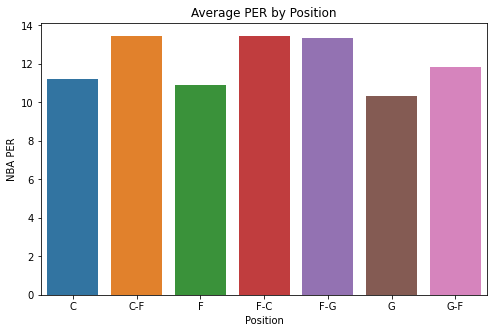

In [8]:
# this chart displays the average PER by position
plt.figure(figsize=(8, 5))
sns.barplot(
    x=per_by_pos['position'],
    y=per_by_pos['NBA_per']
)
plt.title('Average PER by Position')
plt.xlabel('Position')
plt.ylabel('NBA PER')

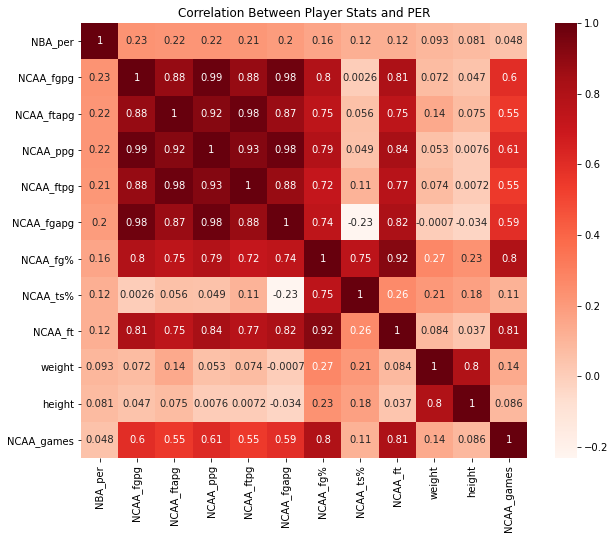

In [9]:
# heatmap to examine the correlation between NCAA statistics and PER
plt.figure(figsize=(10,8))
cor_sorted = final_df[['NBA_per','NCAA_fgpg', 'NCAA_ftapg', 'NCAA_ppg', 'NCAA_ftpg', 
                   'NCAA_fgapg', 'NCAA_fg%', 'NCAA_ts%',
                   'NCAA_ft', 'weight', 'height', 'NCAA_games'
                ]].corr()
sns.heatmap(cor_sorted, annot=True, cmap=plt.cm.Reds)
plt.title('Correlation Between Player Stats and PER')
plt.show()

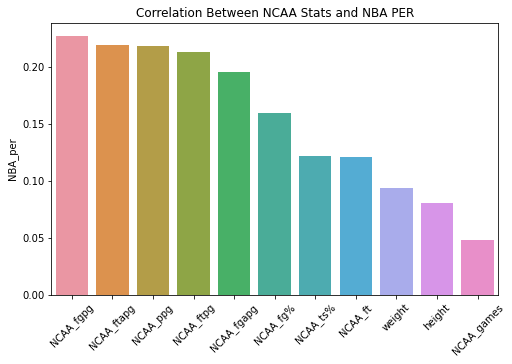

In [10]:
# bar chart to display the NCAA stats that have the highest correlation with PER
# shows the same information as the first row (or column) of the heatmap above
plt.figure(figsize=(8, 5))
sns.barplot(
    x=cor_sorted.columns[1:],
    y=cor_sorted['NBA_per'][1:]
)
plt.title('Correlation Between NCAA Stats and NBA PER')
plt.xticks(rotation=45)
plt.show()

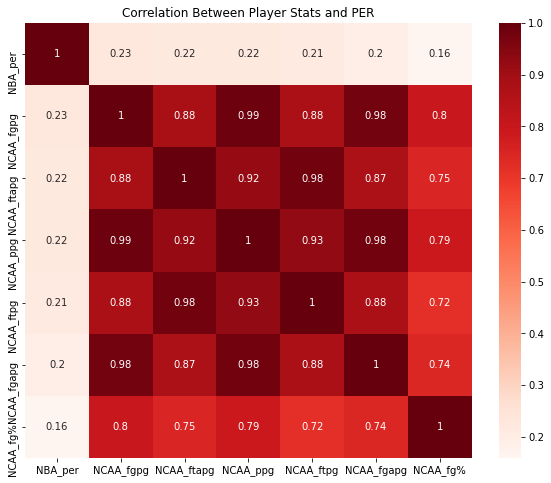

In [11]:
# smaller heatmap to get a better view of the stats that are most highly correlated with PER
plt.figure(figsize=(10,8))
cor_sorted_smaller = final_df[['NBA_per','NCAA_fgpg', 'NCAA_ftapg', 'NCAA_ppg', 'NCAA_ftpg', 
                   'NCAA_fgapg', 'NCAA_fg%'
                ]].corr()
sns.heatmap(cor_sorted_smaller, annot=True, cmap=plt.cm.Reds)
plt.title('Correlation Between Player Stats and PER')
plt.show()

In [12]:
# creating a new dataframe to use for a multiple linear regression model
# this dataframe is a copy of the cleaned dataset, without redundant stats and NBA stats besides PER
PER_df = final_df[['NBA_per',       
       'NCAA_fgpg', 'NCAA_ftapg', 'NCAA_ftpg',
       'NCAA_fgapg',
       'weight', 'height',
       'NCAA_games', 'NCAA_3ptpg',
       'NCAA_3ptapg'
                ]].dropna()

# predictor variables include NCAA stats and physical attributes
PER_X = PER_df[['NCAA_fgpg', 'NCAA_ftapg', 'NCAA_ftpg', 
       'NCAA_fgapg',
       'weight', 'height',
       'NCAA_games', 'NCAA_3ptpg',
       'NCAA_3ptapg']]

# dependent variable is PER
PER_Y = PER_df[['NBA_per']]

In [13]:
# splitting the data into train and test sets
PER_train_X, PER_test_X, PER_train_Y, PER_test_Y = train_test_split(PER_X, PER_Y, test_size=0.2, random_state=200)

In [14]:
# adding a constant in order to use OLS
PER_train_X = sm.add_constant(PER_train_X)

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [15]:
# creating a multiple linear regression model with the training sets
model = sm.OLS(PER_train_Y, PER_train_X).fit()

In [16]:
# adding a constant in order to use OLS
PER_test_X = sm.add_constant(PER_test_X)

# predicting player PER values based on the test set
predictions = model.predict(PER_test_X)

In [17]:
# transforming the predictions into a list
pred = predictions.tolist()

# transforming the actual PER values into a list
actual = PER_test_Y['NBA_per'].tolist()

# creating a dataframe containing predicted and actual PER values
pred_v_actual = pd.DataFrame(list(zip(actual, pred)), columns=['Actual PER', 'Predicted PER'])

<Figure size 864x720 with 0 Axes>

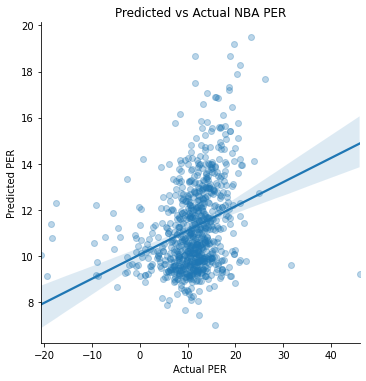

In [18]:
# plotting the predicted and actual values to see if there is a correlation
plt.figure(figsize=(12,10))
sns.lmplot(
    x='Actual PER',
    y='Predicted PER',
    data=pred_v_actual,
    fit_reg=True,
    scatter_kws={'alpha':0.3}
)
plt.title('Predicted vs Actual NBA PER')
plt.show()

In [19]:
# checking the model summary to see the results
# within an adjusted R-squared of 0.087, this model is very innacurate
print_model = model.summary()
print(print_model) 

                            OLS Regression Results                            
Dep. Variable:                NBA_per   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.087
Method:                 Least Squares   F-statistic:                     34.58
Date:                Thu, 09 Dec 2021   Prob (F-statistic):           1.04e-58
Time:                        17:57:47   Log-Likelihood:                -10398.
No. Observations:                3182   AIC:                         2.082e+04
Df Residuals:                    3172   BIC:                         2.088e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           2.6146      3.443      0.759      